# <center>Avaliação técnica — Quaest, Data Scientist Jr.</center>
### <center> Ramon Batista de Araújo</center>


O objetivo deste teste é avaliar um pouco suas habilidades como cientista de dados e, também, demonstrar como será parte do seu dia a dia atuando na Quaest.

#### Dataset
Base de dados resumida e fictícia <br>
Arquivo 'bd_surveyquaest.xlsx' 

#### Variáveis
sbjnum: id do respondente<br>
sexo: sexo do respondente<br>
idade: idade (numérica) do respondente<br>
rendaf: renda familiar do respondente<br>
esc: escolaridade do respondente<br>
aval_gov: avaliação do governo<br>
voto1: intenção de voto do respondente.<br>

### Atividades
##### Tabela de contigência 
Crie uma função em alguma linguagem de programação, preferencialmente em R ou Python, que automatize a construção de tabelas de contingência. O objetivo é identificar se há uma diferença sociodemográfica na intenção de voto. Em outras palavras, por ex.: As mulheres e os homens estão votando no mesmo candidato ?

##### Gráficos
2.1) O primeiro gráfico será da variável intenção de voto.

2.2) Já o segundo, plot um gráfico que represente o cruzamento entre as variáveis intenção de voto e avaliação do governo. Quem avalia o governo de forma positiva, vota em qual candidato ? E quem avalia de forma negativa ?


### Importando as bibliotecas

In [1]:
#Instalação das bibliotecas (se necessário)
# !pip install pandas
# !pip install numpy
# !pip install sys
# !pip install seaborn
# !pip install matplotlib

In [2]:
#Tratamento dos dados
import pandas as pd
import numpy as np
import sys
import xlsxwriter

#Criação de Gráficos
import seaborn as sns
import matplotlib as mpl  
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

### Importando o banco de dados

In [3]:
bd = pd.read_excel('bd_surveyquaest.xlsx') #Importando a planilha

bd.head() #Lendo as primeiras linhas

,sbjnum,sexo,idade,rendaf,esc,aval_gov,voto1
0,136037235,Masculino,57,"De R$ 2.091,00 a R$ 3.135,00 (+ de 2SM até 3 SM)",Ensino médio completo,Regular positiva,Candidato 2
1,136037575,Masculino,32,"De R$ 2.091,00 a R$ 3.135,00 (+ de 2SM até 3 SM)",Ensino médio completo,Boa,Ninguém/Branco/Nulo
2,136038074,Masculino,70,"De R$ 5.226,00 a R$ 10.450,00 (+ de 5SM até 10...",Ensino médio completo,Boa,Candidato 2
3,136041069,Masculino,50,"De R$ 2.091,00 a R$ 3.135,00 (+ de 2SM até 3 SM)",Ensino fundamental incompleto,Ótima,Candidato 2
4,136041107,Masculino,24,"De R$ 3.136,00 a R$ 5.225,00 (+ de 3SM até 5 SM)",Ensino superior incompleto,Boa,Candidato 2


### Análise Exploratória 

In [4]:
#Verificando o tamanho do dataset

bd.shape #1000 registros e 7 variáveis

(1000, 7)

In [5]:
#Confirmando o nome das variáveis
bd.columns

Index(['sbjnum', 'sexo', 'idade', 'rendaf', 'esc', 'aval_gov', 'voto1'], dtype='object')

In [6]:
#Verificando valores ausentes

bd.isna().sum() #Não existem valores ausentes

sbjnum      0
sexo        0
idade       0
rendaf      0
esc         0
aval_gov    0
voto1       0
dtype: int64

In [7]:
#Verificando valores duplicados

bd.duplicated().sum() #Não existem registros duplicados

0

In [8]:
#Verificando os tipos de variáveis

bd.info() #Categoricas e Inteiro

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sbjnum    1000 non-null   int64 
 1   sexo      1000 non-null   object
 2   idade     1000 non-null   int64 
 3   rendaf    1000 non-null   object
 4   esc       1000 non-null   object
 5   aval_gov  1000 non-null   object
 6   voto1     1000 non-null   object
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


#### Verificando os valores únicos e outliers de cada variável

In [9]:
#Conferência de valores únicos

bd.nunique()

sbjnum      1000
sexo           2
idade         67
rendaf         8
esc            7
aval_gov       7
voto1         16
dtype: int64

In [10]:
#Sexo 

bd['sexo'].value_counts()

Feminino     545
Masculino    455
Name: sexo, dtype: int64

In [11]:
#Idade

bd['idade'].describe()

count    1000.000000
mean       44.286000
std        16.277874
min        17.000000
25%        30.000000
50%        43.000000
75%        58.000000
max        86.000000
Name: idade, dtype: float64

In [12]:
#Renda

bd['rendaf'].value_counts()

De R$ 1.046,00 a R$ 2.090,00 (+ de 1SM até 2 SM)        246
De R$ 2.091,00 a R$ 3.135,00 (+ de 2SM até 3 SM)        210
Até R$ 1.045,00 (até 1 SM)                              205
De R$ 3.136,00 a R$ 5.225,00 (+ de 3SM até 5 SM)        177
De R$ 5.226,00 a R$ 10.450,00 (+ de 5SM até 10 SM)      110
De R$ 10.451,00 a R$ 15.675,00 (+ de 10SM até 15 SM)     28
De R$ 15.676,00 a R$ 20.900,00 (+ de 15SM até 20 SM)     17
Mais de R$ 20.900,00 (+ de 20 SM)                         7
Name: rendaf, dtype: int64

In [13]:
#Escolaridade

bd['esc'].value_counts()

Ensino médio completo                       326
Ensino superior completo                    195
Ensino fundamental incompleto               184
Ensino superior incompleto                  105
Ensino médio incompleto                      89
Ensino fundamental completo                  84
Sem instrução e menos de 1 ano de estudo     17
Name: esc, dtype: int64

In [14]:
#Avaliação do governo

bd['aval_gov'].value_counts()

Boa                 443
Ótima               181
Regular positiva    175
Regular negativa     74
Péssima              64
Ruim                 49
NS/NR                14
Name: aval_gov, dtype: int64

In [15]:
#Intenção de voto

bd['voto1'].value_counts()

Candidato 2            523
Ninguém/Branco/Nulo    142
NS/NR                  140
Candidato 1             42
Candidato 8             26
Candidato 5             25
Candidato 10            20
Candidato 9             19
Candidato 3             16
Candidato 4             12
Candidato 6             10
Candidato 7              7
Candidato 14             6
Candidato 12             6
Candidato 13             3
Candidato 11             3
Name: voto1, dtype: int64

#### Categorizando as idades de acordo com o eleitorado do TSE

BRASIL. TRIBUNAL SUPERIOR ELEITORAL. Estatísticas Eleitorais. 2020. Data da última atualização: 10.9.2020 - 23:04. Disponível em: https://www.tse.jus.br/eleicoes/estatisticas/estatisticas-eleitorais . Acesso em: 26 abr. 2021 
<br>

##### As Faixas etárias de acordo com o TSE são:

16 anos <br>
17 anos <br>
18 anos <br>
19 anos <br> 
20 anos <br>
21 a 24 anos <br>
25 a 29 anos <br>
30 a 34 anos <br>
35 a 39 anos <br>
40 a 44 anos <br> 
45 a 49 anos <br>
50 a 54 anos <br>
55 a 59 anos <br>
60 a 64 anos <br>
65 a 69 anos <br>
70 a 74 anos <br>
75 a 79 anos <br>
80 a 84 anos <br>
85 a 89 anos <br>
90 a 94 anos <br>
95 a 99 anos <br>
100 anos ou mais <br>

In [16]:
#Categoriazando as idades

bd['faixa_etaria']=pd.cut(

   bd['idade'],

   bins=[16, 17, 18, 19, 20, 21, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, sys.maxsize],

   labels=['16 anos',
           '17 anos',
           '18 anos',
           '19 anos',
           '20 anos',
           '21 a 24 anos',
           '25 a 29 anos',
           '30 a 34 anos',
           '35 a 39 anos',
           '40 a 44 anos',
           '45 a 49 anos',
           '50 a 54 anos',
           '55 a 59 anos',
           '60 a 64 anos',
           '65 a 69 anos',
           '70 a 74 anos',
           '75 a 79 anos',
           '80 a 84 anos',
           '85 a 89 anos']       
)

bd['faixa_etaria'].value_counts() #Quantidade de eleitores por idade

55 a 59 anos    117
35 a 39 anos    114
25 a 29 anos     99
45 a 49 anos     87
60 a 64 anos     86
30 a 34 anos     86
40 a 44 anos     81
50 a 54 anos     74
21 a 24 anos     72
65 a 69 anos     48
70 a 74 anos     30
17 anos          25
19 anos          23
18 anos          22
75 a 79 anos     18
20 anos           9
16 anos           6
80 a 84 anos      2
85 a 89 anos      1
Name: faixa_etaria, dtype: int64

## Criando para construção de tabelas de contingência.

In [17]:
#Função tabela de contigência com os total

def contigencia(tabela):
    tabela = pd.crosstab(tabela,bd['voto1'], dropna=False, margins=True, margins_name="Total" )
    return tabela


In [18]:
#Função tabela de contigência sem os total

def contig_sem_total(tabela):
    tabela = pd.crosstab(tabela,bd['voto1'], dropna=False)
    return tabela

In [19]:
df = bd.drop(columns=['sbjnum', 'idade', 'voto1']) #Eliminando as colunas desnecessárias na tabela de contigência 
df.head()

,sexo,rendaf,esc,aval_gov,faixa_etaria
0,Masculino,"De R$ 2.091,00 a R$ 3.135,00 (+ de 2SM até 3 SM)",Ensino médio completo,Regular positiva,55 a 59 anos
1,Masculino,"De R$ 2.091,00 a R$ 3.135,00 (+ de 2SM até 3 SM)",Ensino médio completo,Boa,30 a 34 anos
2,Masculino,"De R$ 5.226,00 a R$ 10.450,00 (+ de 5SM até 10...",Ensino médio completo,Boa,65 a 69 anos
3,Masculino,"De R$ 2.091,00 a R$ 3.135,00 (+ de 2SM até 3 SM)",Ensino fundamental incompleto,Ótima,45 a 49 anos
4,Masculino,"De R$ 3.136,00 a R$ 5.225,00 (+ de 3SM até 5 SM)",Ensino superior incompleto,Boa,21 a 24 anos


In [20]:
lista_col = list(df.columns) #listando as colunas
lista_col

['sexo', 'rendaf', 'esc', 'aval_gov', 'faixa_etaria']

In [21]:
writer = pd.ExcelWriter('tabela_contigencia.xlsx', engine='xlsxwriter') #Criar um arquivo Excel

In [22]:
#Automatização da criação de tabelas

for i in range(len(lista_col)):
    colunas = bd[lista_col[i]]
    tabela = contigencia(colunas) #criar tabelas pela função
    
    nome_planilha = lista_col[i]
    tabela.to_excel(writer,sheet_name=nome_planilha, index=False) #Escrever no arquivo excel
    
writer.save() #Fechar o arquivo

#### As mulheres e os homens estão votando no mesmo candidato ?

In [23]:
#Pode-se criar uma Lista com as colunas que deseja criar a tabela de contigência

colunas = [bd['sexo']]

In [24]:
#A função recebe as colunas para criar a tabela de contigência com a intenção de voto

tabela_cont = contigencia(colunas) 
tabela_cont

voto1,Candidato 1,Candidato 10,Candidato 11,Candidato 12,Candidato 13,Candidato 14,Candidato 2,Candidato 3,Candidato 4,Candidato 5,Candidato 6,Candidato 7,Candidato 8,Candidato 9,NS/NR,Ninguém/Branco/Nulo,Total
sexo,,,,,,,,,,,,,,,,,
Feminino,11,14,1,3,2,6,295,9,4,14,7,3,14,7,83,72,545
Masculino,31,6,2,3,1,0,228,7,8,11,3,4,12,12,57,70,455
Total,42,20,3,6,3,6,523,16,12,25,10,7,26,19,140,142,1000


In [25]:
#Calculando as porcentagens de intenção de voto por sexo

colunas = tabela_cont.shape[0]
for i in list(range(colunas)):
    tabela_cont.iloc[i] = tabela_cont.iloc[i]/tabela_cont.iloc[i, -1]*100
    
tabela_cont


voto1,Candidato 1,Candidato 10,Candidato 11,Candidato 12,Candidato 13,Candidato 14,Candidato 2,Candidato 3,Candidato 4,Candidato 5,Candidato 6,Candidato 7,Candidato 8,Candidato 9,NS/NR,Ninguém/Branco/Nulo,Total
sexo,,,,,,,,,,,,,,,,,
Feminino,2.018349,2.568807,0.183486,0.550459,0.366972,1.100917,54.12844,1.651376,0.733945,2.568807,1.284404,0.550459,2.568807,1.284404,15.229358,13.211009,100.0
Masculino,6.813187,1.318681,0.439560,0.659341,0.219780,0.000000,50.10989,1.538462,1.758242,2.417582,0.659341,0.879121,2.637363,2.637363,12.527473,15.384615,100.0
Total,4.200000,2.000000,0.300000,0.600000,0.300000,0.600000,52.30000,1.600000,1.200000,2.500000,1.000000,0.700000,2.600000,1.900000,14.000000,14.200000,100.0


# 
Ou seja, 54,12844% entre as 545 mulheres entrevistadas têm a intenção de votar no candidato 2. Assim como os 50,10989% entre os 455 homens entrevistas também têm a intenção de votar no candidato 2.

## Gráfico da variável intenção de voto

In [26]:
#Selecionando somente a intenção de voto

intencao = bd['voto1'].value_counts().reset_index()

In [27]:
#Porcentagem

tamanho_amostra = len(bd) #Tamanho da amostra
intencao['voto1'] = (intencao['voto1']/tamanho_amostra)*100 

intencao #banco de dados com a intenção de voto

,index,voto1
0,Candidato 2,52.3
1,Ninguém/Branco/Nulo,14.2
2,NS/NR,14.0
3,Candidato 1,4.2
4,Candidato 8,2.6
5,Candidato 5,2.5
6,Candidato 10,2.0
7,Candidato 9,1.9
8,Candidato 3,1.6
9,Candidato 4,1.2


In [28]:
#Ordenando os candidatos antes dos Ninguém/Branco/Nulo e NS/NR

#Removendo do dataset
intencao_cand = intencao[intencao['index'] != 'NS/NR'] 
intencao_cand = intencao_cand[intencao_cand['index'] !=  'Ninguém/Branco/Nulo']
intencao_cand

,index,voto1
0,Candidato 2,52.3
3,Candidato 1,4.2
4,Candidato 8,2.6
5,Candidato 5,2.5
6,Candidato 10,2.0
7,Candidato 9,1.9
8,Candidato 3,1.6
9,Candidato 4,1.2
10,Candidato 6,1.0
11,Candidato 7,0.7


In [29]:
#Criando novas variaveis

NS = intencao[intencao['index'] == 'NS/NR'] 
Ning = intencao[intencao['index'] == 'Ninguém/Branco/Nulo'] 

In [30]:
#Adicionando novas variaveis ao final do dataset

intencao_cand = intencao_cand.append(Ning)

intencao_cand = intencao_cand.append(NS)
intencao_cand

,index,voto1
0,Candidato 2,52.3
3,Candidato 1,4.2
4,Candidato 8,2.6
5,Candidato 5,2.5
6,Candidato 10,2.0
7,Candidato 9,1.9
8,Candidato 3,1.6
9,Candidato 4,1.2
10,Candidato 6,1.0
11,Candidato 7,0.7


In [31]:
#Adicionando novas variaveis ao final do dataset


intencao_cand.reset_index(drop=True, inplace=True)
intencao_cand

,index,voto1
0,Candidato 2,52.3
1,Candidato 1,4.2
2,Candidato 8,2.6
3,Candidato 5,2.5
4,Candidato 10,2.0
5,Candidato 9,1.9
6,Candidato 3,1.6
7,Candidato 4,1.2
8,Candidato 6,1.0
9,Candidato 7,0.7


In [32]:
#Renomeando a coluna candidato

intencao_cand.rename(columns={'index': 'candidato'}, inplace=True)

#### Criando o gráfico

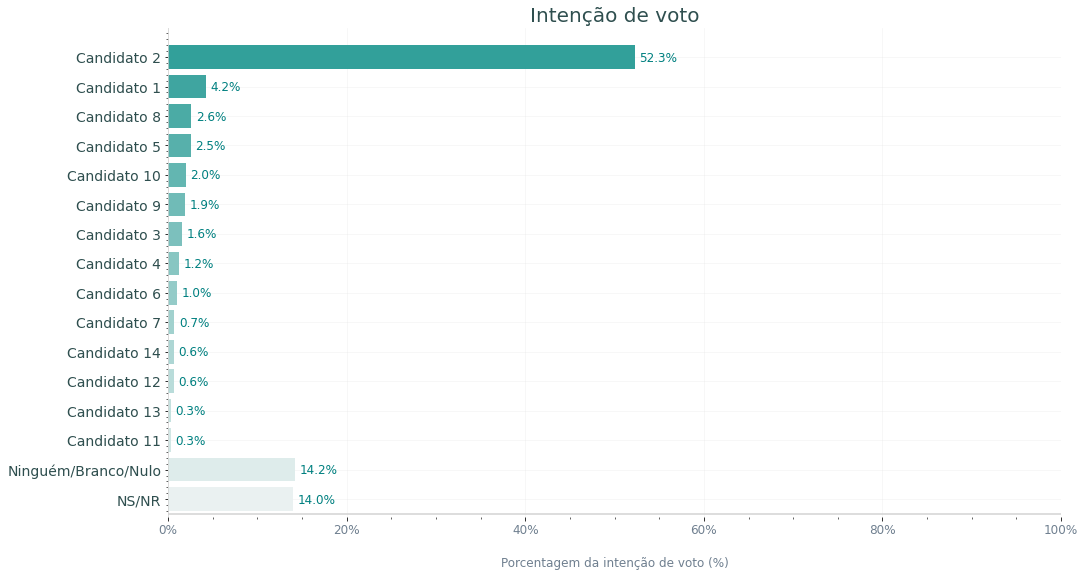

In [33]:
#Cor degradê que quanto menor a quantidade de votos, menor será <br> a saturação,
## O objetivo é destacar os candidatos com maior número de votos.

cores = sns.light_palette("lightseagreen",16, reverse=True)

#Tamanho do gráfico na proporção de uma tela widrescreen (16:9) para evitar erros de proporções  
fig = plt.figure(figsize=(16,9)) 

#Criando o gráfico de barras horizontais para o que o nome do candidato apareça por completo
#sem necessidade de rotacionar para não dificultar a leitura.

ax = sns.barplot(data=intencao_cand, y="candidato", x="voto1", palette=cores, zorder=2) 

#Titulo do gráfico
plt.title('Intenção de voto',fontsize=20, color='darkslategray')

#Criação dos eixos 
plt.xlabel('Porcentagem da intenção de voto (%)',fontsize=12, labelpad=20, color='slategray')
plt.ylabel('',fontsize=0, labelpad=0, color='slategray')
plt.xticks(fontsize=12, color='slategray')
plt.yticks(fontsize=14, color='darkslategray')
fmt = '%.0f%%' 
xticks = mtick.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(xticks)

#Distanciamento das bordas
plt.ylim(bottom=15.6, top=-1.0)
plt.xlim(0,100)

#Grade no fundo para facilitar a leitura, em cor clara para evitar conflito com as barras horizontais.
plt.grid( alpha=0.15, color='silver', zorder=-1)
voto1 = intencao_cand['voto1']

#Porcentagem das barras
for p in ax.patches:
    percentage ='{:,.1f}%'.format(p.get_width())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.5
    y=p.get_y()+height/1.5
    ax.annotate(percentage,(x,y), size = 12, color='teal')
    
#Reomação do quadro e inclusão apenas dos eixos verticais e horizontais com maior graduação.
plt.box(on=None)
ax.minorticks_on()
plt.axvline(x=0, ymin=0, ymax=1, color='lightgray')
plt.axhline(y=15.5, xmin=0, xmax=1, color='lightgray')

#Salvar gráfico em arquivo svg (Scalable Vector Graphics) 
#para não perder resolução quando ampliado ou reduzido em suas aplicações.
plt.savefig('intencao_voto.svg', format='svg', bbox_inches='tight')

Não agrupou-se os canditados com menos de 1%. Pois, como exemplo, se a margem de erro for de três pontos percentuais, excluindo-se o primeiro colocado (candidato 2) o restante pode variar de posição.

## Cruzamento entre as variáveis intenção de voto e avaliação do governo

In [34]:
#Utilizando a função criada de tabela de contigência

#Seleção da coluna avaliação do governo
colunas = bd['aval_gov']

In [35]:
#Criando a tabela de contigência com total

tabela_cont = contigencia(colunas).T #Tabela Transposta
tabela_cont

aval_gov,Boa,NS/NR,Péssima,Regular negativa,Regular positiva,Ruim,Ótima,Total
voto1,,,,,,,,
Candidato 1,14,0,5,7,10,3,3,42
Candidato 10,6,0,2,1,8,1,2,20
Candidato 11,0,0,1,0,0,1,1,3
Candidato 12,2,0,1,0,1,0,2,6
Candidato 13,1,0,0,1,0,0,1,3
Candidato 14,2,0,1,1,1,0,1,6
Candidato 2,300,1,1,7,59,1,154,523
Candidato 3,8,0,0,4,2,2,0,16
Candidato 4,6,0,0,2,4,0,0,12


In [36]:
#Calculando as porcentagens em relação para cada a item da escala de avaliação

colunas = tabela_cont.shape[1]
for i in list(range(colunas)):
    tabela_cont.iloc[:,i] = (tabela_cont.iloc[:,i]/tabela_cont.iloc[-1,i])*100
    
tabela_cont #Percebe-se nas linha Total o percentual total de cada item da escala. 

#Na coluna Total têm-se o percentual de intenção de votos de cada candidato. 

aval_gov,Boa,NS/NR,Péssima,Regular negativa,Regular positiva,Ruim,Ótima,Total
voto1,,,,,,,,
Candidato 1,3.160271,0.000000,7.8125,9.459459,5.714286,6.122449,1.657459,4.2
Candidato 10,1.354402,0.000000,3.1250,1.351351,4.571429,2.040816,1.104972,2.0
Candidato 11,0.000000,0.000000,1.5625,0.000000,0.000000,2.040816,0.552486,0.3
Candidato 12,0.451467,0.000000,1.5625,0.000000,0.571429,0.000000,1.104972,0.6
Candidato 13,0.225734,0.000000,0.0000,1.351351,0.000000,0.000000,0.552486,0.3
Candidato 14,0.451467,0.000000,1.5625,1.351351,0.571429,0.000000,0.552486,0.6
Candidato 2,67.720090,7.142857,1.5625,9.459459,33.714286,2.040816,85.082873,52.3
Candidato 3,1.805869,0.000000,0.0000,5.405405,1.142857,4.081633,0.000000,1.6
Candidato 4,1.354402,0.000000,0.0000,2.702703,2.285714,0.000000,0.000000,1.2


In [37]:
#Removendo a linha e coluna Total

tabela_cont = tabela_cont.iloc[:-1,:-1]
tabela_cont

aval_gov,Boa,NS/NR,Péssima,Regular negativa,Regular positiva,Ruim,Ótima
voto1,,,,,,,
Candidato 1,3.160271,0.000000,7.8125,9.459459,5.714286,6.122449,1.657459
Candidato 10,1.354402,0.000000,3.1250,1.351351,4.571429,2.040816,1.104972
Candidato 11,0.000000,0.000000,1.5625,0.000000,0.000000,2.040816,0.552486
Candidato 12,0.451467,0.000000,1.5625,0.000000,0.571429,0.000000,1.104972
Candidato 13,0.225734,0.000000,0.0000,1.351351,0.000000,0.000000,0.552486
Candidato 14,0.451467,0.000000,1.5625,1.351351,0.571429,0.000000,0.552486
Candidato 2,67.720090,7.142857,1.5625,9.459459,33.714286,2.040816,85.082873
Candidato 3,1.805869,0.000000,0.0000,5.405405,1.142857,4.081633,0.000000
Candidato 4,1.354402,0.000000,0.0000,2.702703,2.285714,0.000000,0.000000


In [38]:
#Ordendando as colunas do pior para o melhor avaliação

tabela_cont = tabela_cont.iloc[:,[2,5,3,1,4,0,6]]
tabela_cont

aval_gov,Péssima,Ruim,Regular negativa,NS/NR,Regular positiva,Boa,Ótima
voto1,,,,,,,
Candidato 1,7.8125,6.122449,9.459459,0.000000,5.714286,3.160271,1.657459
Candidato 10,3.1250,2.040816,1.351351,0.000000,4.571429,1.354402,1.104972
Candidato 11,1.5625,2.040816,0.000000,0.000000,0.000000,0.000000,0.552486
Candidato 12,1.5625,0.000000,0.000000,0.000000,0.571429,0.451467,1.104972
Candidato 13,0.0000,0.000000,1.351351,0.000000,0.000000,0.225734,0.552486
Candidato 14,1.5625,0.000000,1.351351,0.000000,0.571429,0.451467,0.552486
Candidato 2,1.5625,2.040816,9.459459,7.142857,33.714286,67.720090,85.082873
Candidato 3,0.0000,4.081633,5.405405,0.000000,1.142857,1.805869,0.000000
Candidato 4,0.0000,0.000000,2.702703,0.000000,2.285714,1.354402,0.000000


In [39]:
#Ordendando os candidatos pela total de intenção de votos

tabela_cont.reset_index(inplace=True)
tabela_cont.rename(columns={'voto1': 'candidato'}, inplace=True)
tabela_cont

C:\Users\Ramon\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


aval_gov,candidato,Péssima,Ruim,Regular negativa,NS/NR,Regular positiva,Boa,Ótima
0,Candidato 1,7.8125,6.122449,9.459459,0.000000,5.714286,3.160271,1.657459
1,Candidato 10,3.1250,2.040816,1.351351,0.000000,4.571429,1.354402,1.104972
2,Candidato 11,1.5625,2.040816,0.000000,0.000000,0.000000,0.000000,0.552486
3,Candidato 12,1.5625,0.000000,0.000000,0.000000,0.571429,0.451467,1.104972
4,Candidato 13,0.0000,0.000000,1.351351,0.000000,0.000000,0.225734,0.552486
5,Candidato 14,1.5625,0.000000,1.351351,0.000000,0.571429,0.451467,0.552486
6,Candidato 2,1.5625,2.040816,9.459459,7.142857,33.714286,67.720090,85.082873
7,Candidato 3,0.0000,4.081633,5.405405,0.000000,1.142857,1.805869,0.000000
8,Candidato 4,0.0000,0.000000,2.702703,0.000000,2.285714,1.354402,0.000000
9,Candidato 5,1.5625,4.081633,9.459459,0.000000,2.285714,2.483070,0.000000


In [40]:
#Concatenando a tabela de contigência com a tabela de intenção de votos utilizada no gráfico de intenção de votos

ordem_tab = pd.merge(tabela_cont, intencao_cand, on=['candidato'], how='right')
ordem_tab

,candidato,Péssima,Ruim,Regular negativa,NS/NR,Regular positiva,Boa,Ótima,voto1
0,Candidato 2,1.5625,2.040816,9.459459,7.142857,33.714286,67.720090,85.082873,52.3
1,Candidato 1,7.8125,6.122449,9.459459,0.000000,5.714286,3.160271,1.657459,4.2
2,Candidato 8,10.9375,8.163265,6.756757,0.000000,2.857143,0.451467,1.657459,2.6
3,Candidato 5,1.5625,4.081633,9.459459,0.000000,2.285714,2.483070,0.000000,2.5
4,Candidato 10,3.1250,2.040816,1.351351,0.000000,4.571429,1.354402,1.104972,2.0
5,Candidato 9,1.5625,6.122449,1.351351,0.000000,3.428571,1.580135,0.552486,1.9
6,Candidato 3,0.0000,4.081633,5.405405,0.000000,1.142857,1.805869,0.000000,1.6
7,Candidato 4,0.0000,0.000000,2.702703,0.000000,2.285714,1.354402,0.000000,1.2
8,Candidato 6,1.5625,0.000000,4.054054,0.000000,1.142857,0.902935,0.000000,1.0
9,Candidato 7,1.5625,2.040816,2.702703,0.000000,1.142857,0.225734,0.000000,0.7


In [41]:
#Removendo a coluna de intenção de votos

tabela_cont = ordem_tab.drop(columns=['voto1'])
tabela_cont

,candidato,Péssima,Ruim,Regular negativa,NS/NR,Regular positiva,Boa,Ótima
0,Candidato 2,1.5625,2.040816,9.459459,7.142857,33.714286,67.720090,85.082873
1,Candidato 1,7.8125,6.122449,9.459459,0.000000,5.714286,3.160271,1.657459
2,Candidato 8,10.9375,8.163265,6.756757,0.000000,2.857143,0.451467,1.657459
3,Candidato 5,1.5625,4.081633,9.459459,0.000000,2.285714,2.483070,0.000000
4,Candidato 10,3.1250,2.040816,1.351351,0.000000,4.571429,1.354402,1.104972
5,Candidato 9,1.5625,6.122449,1.351351,0.000000,3.428571,1.580135,0.552486
6,Candidato 3,0.0000,4.081633,5.405405,0.000000,1.142857,1.805869,0.000000
7,Candidato 4,0.0000,0.000000,2.702703,0.000000,2.285714,1.354402,0.000000
8,Candidato 6,1.5625,0.000000,4.054054,0.000000,1.142857,0.902935,0.000000
9,Candidato 7,1.5625,2.040816,2.702703,0.000000,1.142857,0.225734,0.000000


In [42]:
#Definindo candidato como index

tabela_cont = tabela_cont.set_index("candidato")
tabela_cont

,Péssima,Ruim,Regular negativa,NS/NR,Regular positiva,Boa,Ótima
candidato,,,,,,,
Candidato 2,1.5625,2.040816,9.459459,7.142857,33.714286,67.720090,85.082873
Candidato 1,7.8125,6.122449,9.459459,0.000000,5.714286,3.160271,1.657459
Candidato 8,10.9375,8.163265,6.756757,0.000000,2.857143,0.451467,1.657459
Candidato 5,1.5625,4.081633,9.459459,0.000000,2.285714,2.483070,0.000000
Candidato 10,3.1250,2.040816,1.351351,0.000000,4.571429,1.354402,1.104972
Candidato 9,1.5625,6.122449,1.351351,0.000000,3.428571,1.580135,0.552486
Candidato 3,0.0000,4.081633,5.405405,0.000000,1.142857,1.805869,0.000000
Candidato 4,0.0000,0.000000,2.702703,0.000000,2.285714,1.354402,0.000000
Candidato 6,1.5625,0.000000,4.054054,0.000000,1.142857,0.902935,0.000000


In [43]:
#Criando a tabela transposta

tabela_cont= tabela_cont.T

tabela_cont

candidato,Candidato 2,Candidato 1,Candidato 8,Candidato 5,Candidato 10,Candidato 9,Candidato 3,Candidato 4,Candidato 6,Candidato 7,Candidato 14,Candidato 12,Candidato 13,Candidato 11,Ninguém/Branco/Nulo,NS/NR
Péssima,1.562500,7.812500,10.937500,1.562500,3.125000,1.562500,0.000000,0.000000,1.562500,1.562500,1.562500,1.562500,0.000000,1.562500,39.062500,26.562500
Ruim,2.040816,6.122449,8.163265,4.081633,2.040816,6.122449,4.081633,0.000000,0.000000,2.040816,0.000000,0.000000,0.000000,2.040816,26.530612,36.734694
Regular negativa,9.459459,9.459459,6.756757,9.459459,1.351351,1.351351,5.405405,2.702703,4.054054,2.702703,1.351351,0.000000,1.351351,0.000000,27.027027,17.567568
NS/NR,7.142857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.714286,57.142857
Regular positiva,33.714286,5.714286,2.857143,2.285714,4.571429,3.428571,1.142857,2.285714,1.142857,1.142857,0.571429,0.571429,0.000000,0.000000,20.000000,20.571429
Boa,67.720090,3.160271,0.451467,2.483070,1.354402,1.580135,1.805869,1.354402,0.902935,0.225734,0.451467,0.451467,0.225734,0.000000,8.126411,9.706546
Ótima,85.082873,1.657459,1.657459,0.000000,1.104972,0.552486,0.000000,0.000000,0.000000,0.000000,0.552486,1.104972,0.552486,0.552486,4.419890,2.762431


In [44]:
#Criando uma lista com o nome dos candidatos 

lista =list(tabela_cont.columns)
lista

['Candidato 2',
 'Candidato 1',
 'Candidato 8',
 'Candidato 5',
 'Candidato 10',
 'Candidato 9',
 'Candidato 3',
 'Candidato 4',
 'Candidato 6',
 'Candidato 7',
 'Candidato 14',
 'Candidato 12',
 'Candidato 13',
 'Candidato 11',
 'Ninguém/Branco/Nulo',
 'NS/NR']

In [45]:
#Criando uma paleta de cores de acordo com as cores dos partidos na ordem da lista acima

cores_dos_partidos = [ 'teal', 
                 'coral', 
                 'mistyrose', 
                 'burlywood', 
                 'darkseagreen', 
                 'cadetblue', 
                 'grey',
                 'rosybrown',
                 'indianred',
                 'palevioletred',
                 'mediumslateblue', 
                 'skyblue',
                 'dodgerblue', 
                 'steelblue',
                 'silver',
                 'slategrey',
                ]

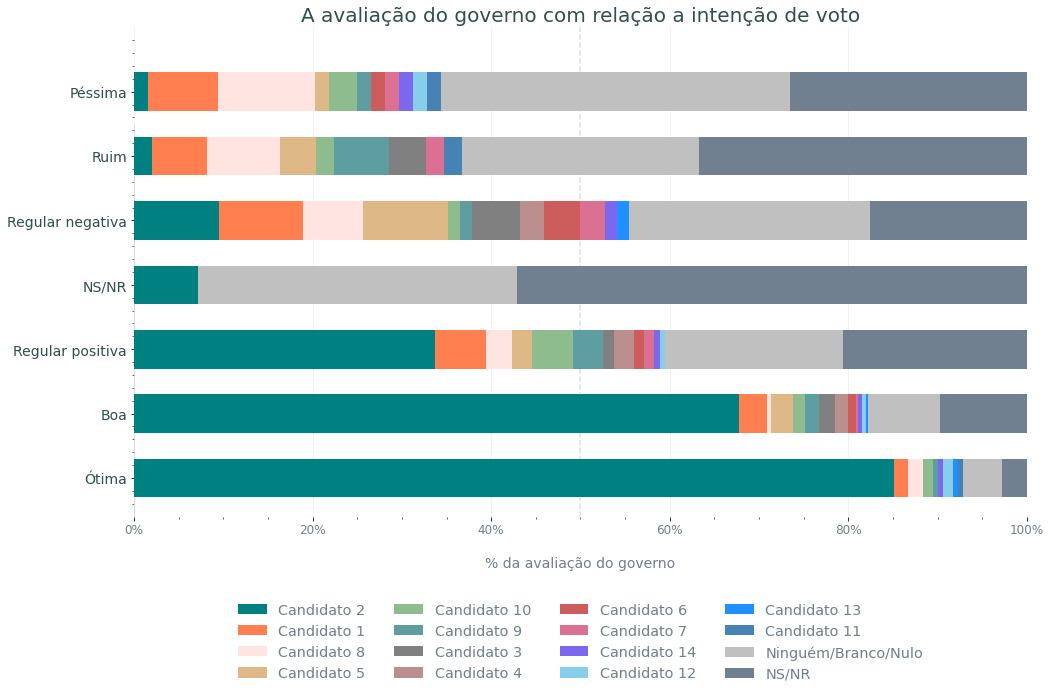

In [46]:

#Criando um gráfico estilo likert com as cores dos partidos de cada candidato
#Proporção tela widrescreen (16:6)
ax = tabela_cont.plot.barh(y=lista, stacked=True, width = 0.6, color=cores_dos_partidos, figsize=(16,9), zorder=3) 


#Criando a legenda
handler, label = ax.get_legend_handles_labels()
ax.legend(
    handler, 
    label, 
    loc='upper center', 
    bbox_to_anchor=(0.5, -0.15), 
    ncol=4, 
    edgecolor='white',
    fontsize = 'x-large',
    labelcolor='slategray')

# Criando um eixo nos 50% para facilitar visualização
z = plt.axvline(x=50, linestyle='--', color='silver', alpha=0.5)
z.set_zorder(-1)

#Título
plt.title('A avaliação do governo com relação a intenção de voto',fontsize=20, color='darkslategray')

#Criação dos eixos 
plt.xlabel('% da avaliação do governo',fontsize=14, labelpad=20, color='slategray')
plt.ylabel('',fontsize=12, labelpad=20, color='slategray')
plt.xticks(fontsize=12, color='slategray')
plt.yticks(fontsize=14, color='darkslategray')
fmt = '%.0f%%' 
xticks = mtick.FormatStrFormatter(fmt)
ax.xaxis.set_major_formatter(xticks)

#Distanciamento das bordas
plt.ylim(bottom=6.6, top=-1.0)
plt.xlim(0,100)

#Grade no fundo para facilitar a leitura.
plt.grid(axis='x', alpha=0.25, color='silver', zorder=-2)

#Reomação do quadro e inclusão apenas dos eixos verticais e horizontais com maior graduação.
plt.box(on=None)
ax.minorticks_on()
plt.axvline(x=0, ymin=0, ymax=0.8, color='lightgray')
plt.axhline(y=15.5, xmin=0, xmax=1, color='lightgray')

#Salvar gráfico em arquivo svg 
plt.savefig('avaliacao_x_intencao.svg', format='svg', bbox_inches='tight');

# 
De acordo com o gráfico acima, a maioria dos eleitores que avaliam o gorveno de forma positiva, isto é, Ótima, Boa e Regular positiva tem a intenção de votar no candidato 2 (Verde Turquesa). 

E a maioria que avalia de forma negativa, ou seja, a avaliação é Péssima, Ruim ou Regular negativa tem intenção de votar em Ninguém/Branco/Nulo ou NS/NR, fora isso tem a intenção de votar no candidato 8 (Rosa Claro) ou candidato 1 (Laranja).

Como pode ser confirmado pela tabela de contigência. 

# 
De acordo com o gráfico acima, a maioria dos eleitores que avaliam o gorveno de forma positiva, isto é, Ótima, Boa e Regular positiva tem a intenção de votar no candidato 2 (Verde Turquesa). 

E a maioria que avalia de forma negativa, ou seja, a avaliação é Péssima, Ruim ou Regular negativa tem intenção de votar em Ninguém/Branco/Nulo ou NS/NR, fora isso tem a intenção de votar no candidato 8 (Rosa Claro) ou no candidato 1 (Laranja).

Como pode ser confirmado pela tabela de contigência. 

# 
O design dos gráficos tem como referência o livro Storytelling com dados.

KNAFLIC, Cole Nussbaumer. Storytelling com dados: um guia sobre visualização de dados para profissionais de negócios. 2ª edição. Traduzido por João Tortello - Rio de Janeiro. ed. Alta Books, 2018. 256 p. v. 1.